#### import dependencies and setup

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key
from citipy import citipy

#### generate cities list

In [13]:
# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# nearest city for each lat, lng mix
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

#### call API

In [16]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
print("Data Retrieval Complete  ")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=kaduqli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=ronne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=zalantun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=kalomo
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d13b926b510b5ed43e31a47ca4d41a39&q=mar del plata
http://api.openweathermap.org/d

In [17]:
#creating a dataframe
city_df = pd.DataFrame(city_data)

# re arranging the columns in data frame 
city_df = city_df [["city","Cloudiness","Humidity","Latitude","Max Temp","Wind Speed"]]
city_df.head()

,city,Cloudiness,Humidity,Latitude,Max Temp,Wind Speed
0,kaduqli,81,82,11.02,76.24,4.38
1,ronne,100,82,55.10,64.40,3.36
2,coquimbo,75,87,-29.95,53.60,3.36
3,zalantun,86,76,48.00,68.45,5.26
4,punta arenas,75,84,-53.15,37.40,6.93


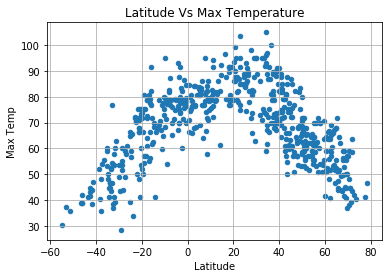

In [19]:
## Latitude Vs Max Temperature plot
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

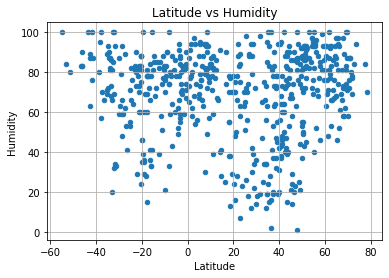

In [20]:
## latitude vs Humidity
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = True)
# save the figure 
plt.savefig("output_plots/Humidity_vs_Latitude.png")
# Display the plot 
plt.show()

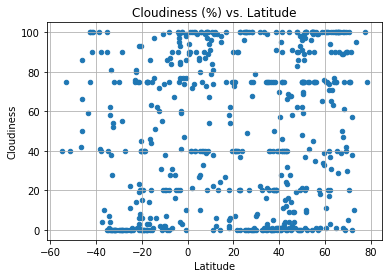

In [21]:
# Cloudiness (%) vs. Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = True)

# save the figure 
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Display the plot 
plt.show()

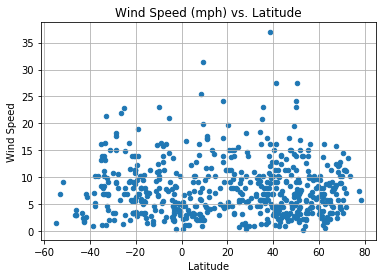

In [22]:
# Wind Speed (mph) vs. Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = True) 

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [25]:
# save the Dataframe to csv file 
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file,index_label ="city_id")